# Boston Project

#### 
- Feature	Description
- CRIM : per capita crime rate by town
- ZN : proportion of residential land zoned for lots over 25,000 sq.ft.
- INDUS : proportion of non-retail business acres per town
- CHAS : Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
- NOX : nitric oxides concentration (parts per 10 million)
- RM : average number of rooms per dwelling
- AGE : proportion of owner-occupied units built prior to 1940
- DIS : weighted distances to ﬁve Boston employment centers
- RAD : index of accessibility to radial highways
- TAX : full-value property-tax rate per 10,000 dollars
- PTRATIO : pupil-teacher ratio by town
- B : 1000(Bk−0.63)2 where Bk is the proportion of blacks by town
- LSTAT : % lower status of the population
- MEDV : Median value of owner-occupied homes in 1000s dollars

In [1]:
import pandas as pd
import numpy as np
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [2]:
boston_data=pd.read_csv("BostonHousing.csv")

In [3]:
boston_data.head(3)

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7


In [4]:
boston_data.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [5]:
boston_data.shape

(506, 14)

In [6]:
boston_data.dtypes

crim       float64
zn         float64
indus      float64
chas         int64
nox        float64
rm         float64
age        float64
dis        float64
rad          int64
tax          int64
ptratio    float64
b          float64
lstat      float64
medv       float64
dtype: object

In [7]:
missing_values=boston_data.isna().sum()
missing_values

crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
b          0
lstat      0
medv       0
dtype: int64

In [8]:
boston_data.columns

Index(['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax',
       'ptratio', 'b', 'lstat', 'medv'],
      dtype='object')

In [9]:
corr_matrix = boston_data.corr()
corr_matrix

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
crim,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
zn,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
indus,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
chas,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
nox,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
rm,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
age,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
dis,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
rad,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
tax,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


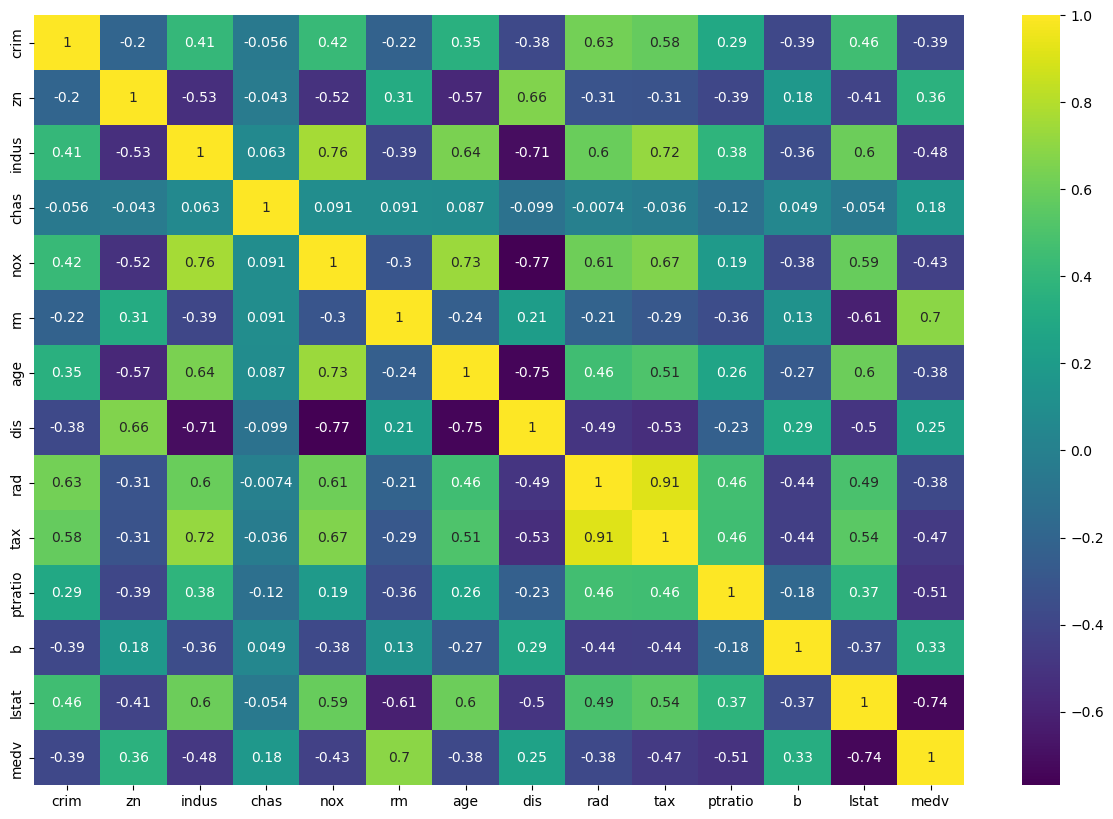

In [10]:
plt.figure(figsize=(15,10))
sns.heatmap(corr_matrix,cmap="viridis", annot=True)
plt.show()

array([[<Axes: xlabel='medv', ylabel='medv'>,
        <Axes: xlabel='lstat', ylabel='medv'>,
        <Axes: xlabel='rm', ylabel='medv'>,
        <Axes: xlabel='ptratio', ylabel='medv'>,
        <Axes: xlabel='indus', ylabel='medv'>,
        <Axes: xlabel='tax', ylabel='medv'>,
        <Axes: xlabel='nox', ylabel='medv'>,
        <Axes: xlabel='b', ylabel='medv'>],
       [<Axes: xlabel='medv', ylabel='lstat'>,
        <Axes: xlabel='lstat', ylabel='lstat'>,
        <Axes: xlabel='rm', ylabel='lstat'>,
        <Axes: xlabel='ptratio', ylabel='lstat'>,
        <Axes: xlabel='indus', ylabel='lstat'>,
        <Axes: xlabel='tax', ylabel='lstat'>,
        <Axes: xlabel='nox', ylabel='lstat'>,
        <Axes: xlabel='b', ylabel='lstat'>],
       [<Axes: xlabel='medv', ylabel='rm'>,
        <Axes: xlabel='lstat', ylabel='rm'>,
        <Axes: xlabel='rm', ylabel='rm'>,
        <Axes: xlabel='ptratio', ylabel='rm'>,
        <Axes: xlabel='indus', ylabel='rm'>,
        <Axes: xlabel='tax', ylabel

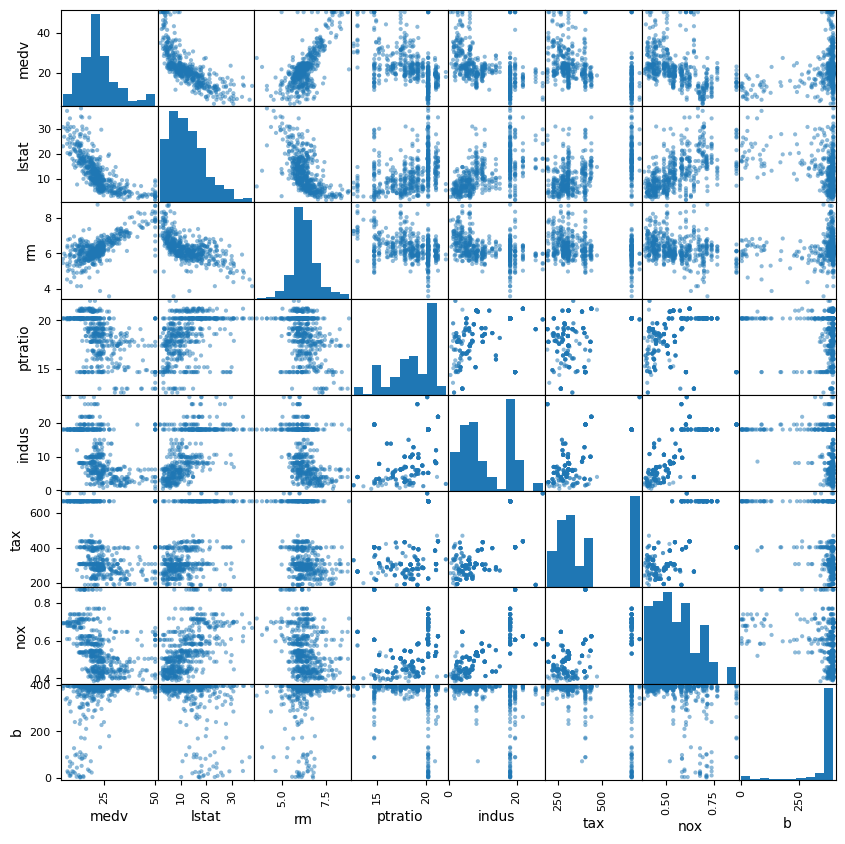

In [11]:
#scatter matrix
columns = ["medv", "lstat", "rm", "ptratio", "indus", "tax", "nox","b"]
scatter_matrix(boston_data[columns], alpha=0.5, figsize=(10,10))

Histograms



C:\Users\thesh\AppData\Local\Temp\ipykernel_10452\817179130.py:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataframe[numeric_columns[i]], kde=False)
C:\Users\thesh\AppData\Local\Temp\ipykernel_10452\817179130.py:12: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataframe[numeric_columns[i+

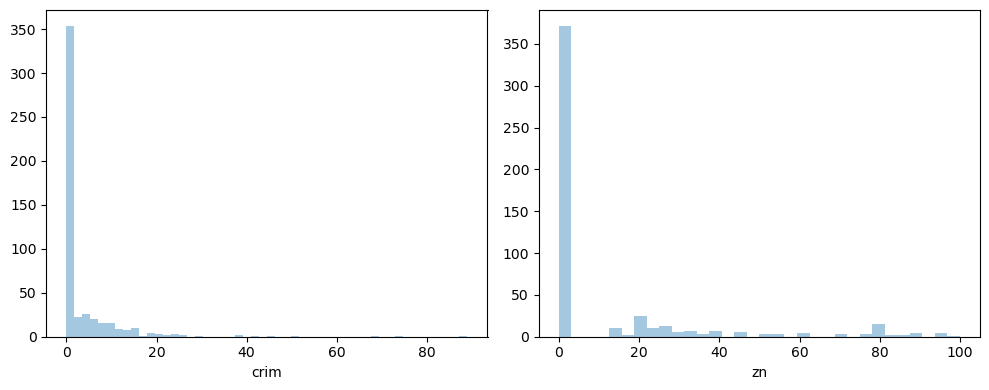

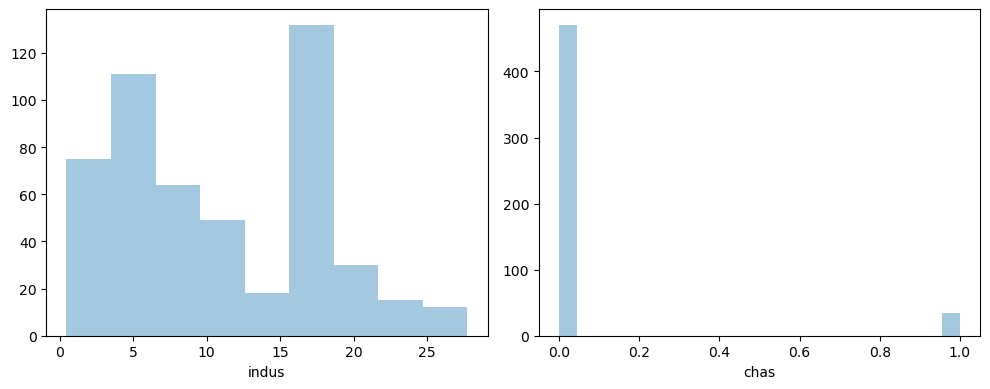

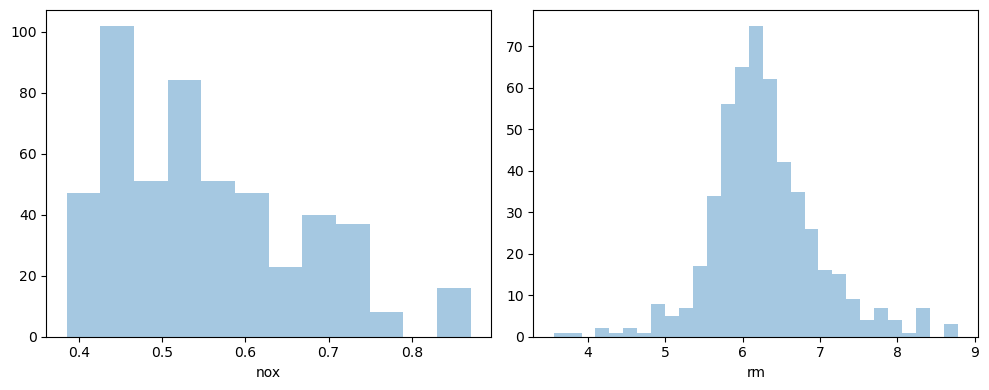

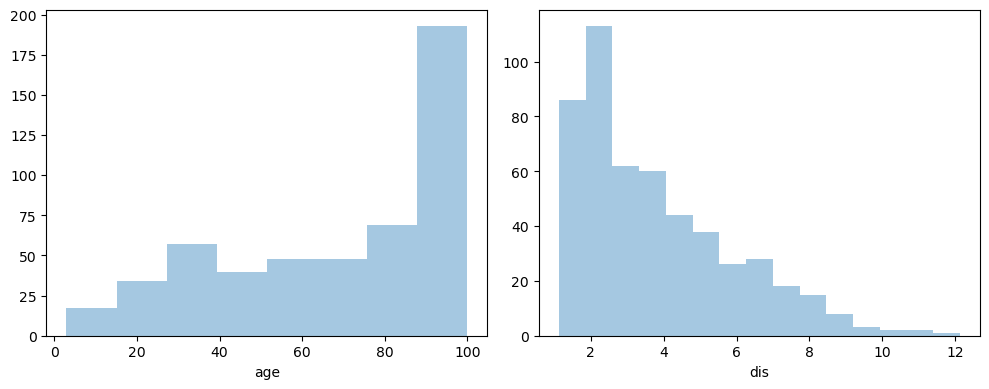

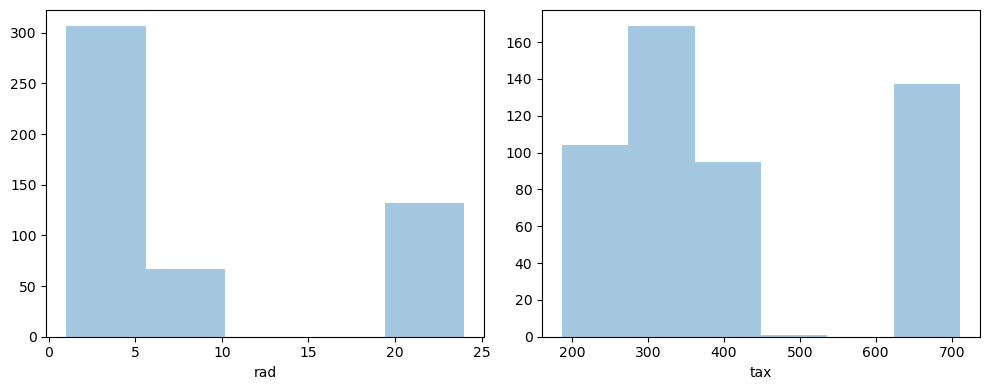

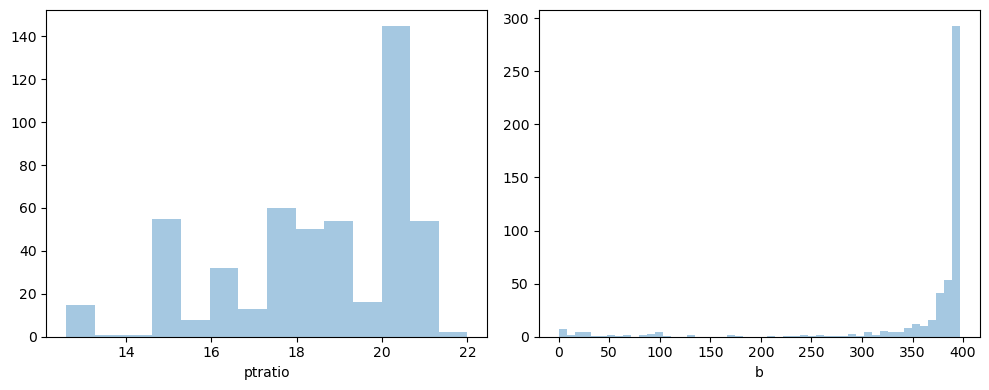

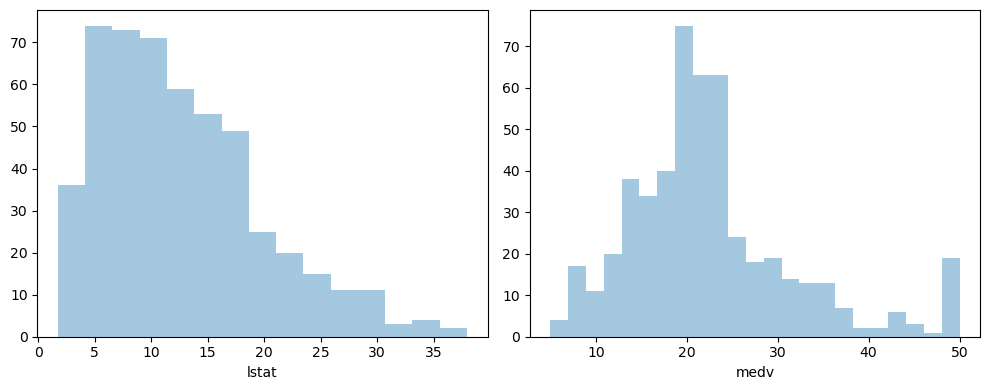


Box Plots



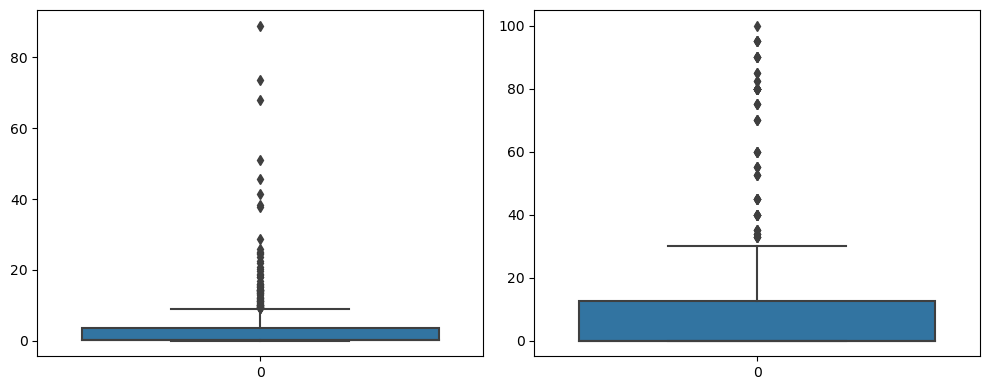

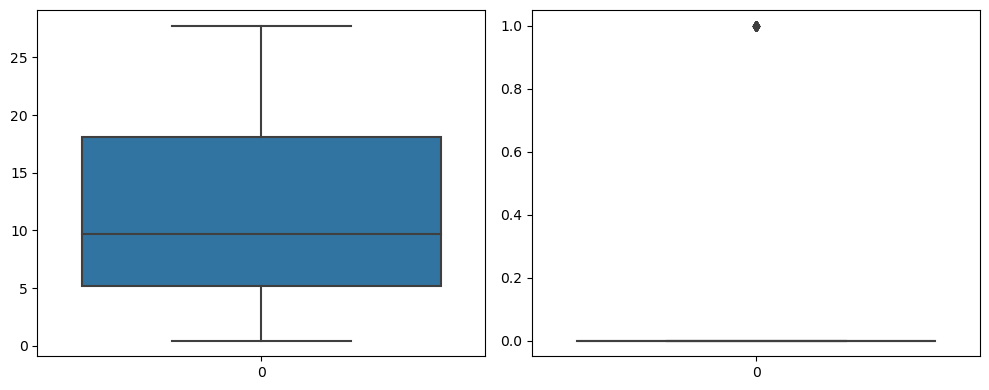

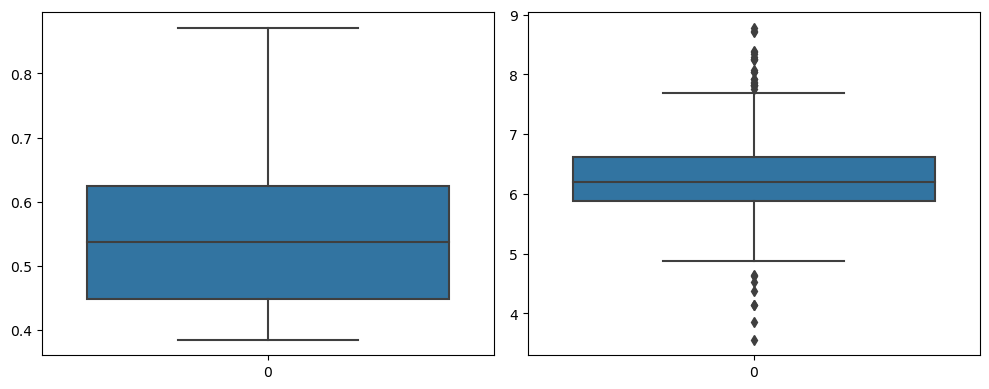

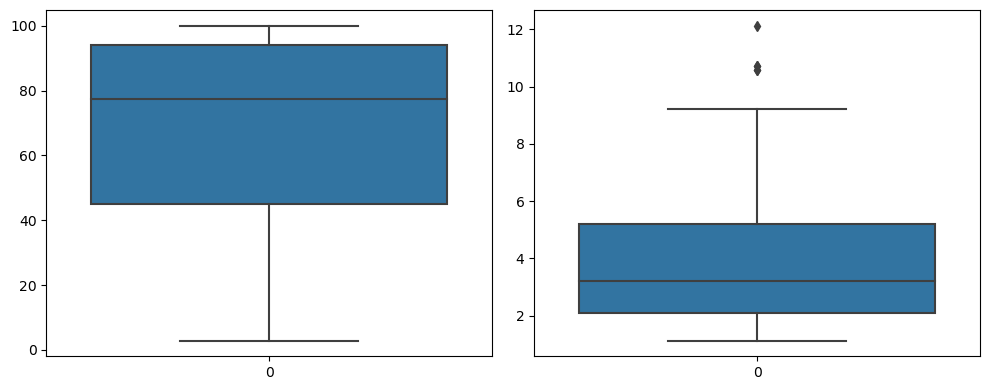

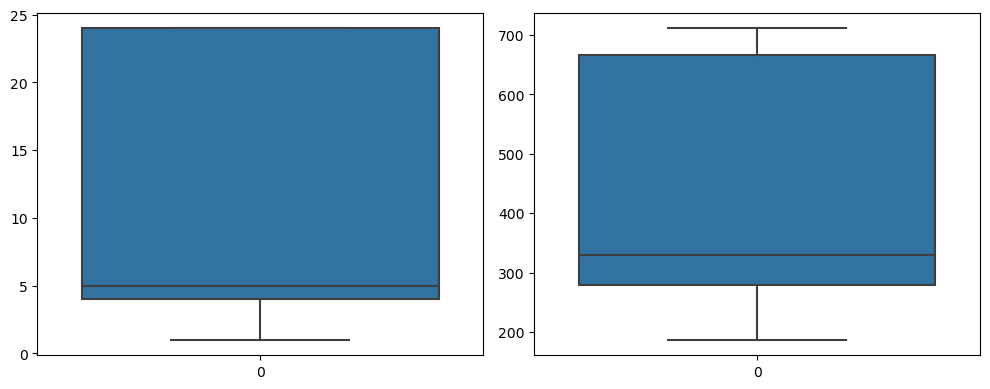

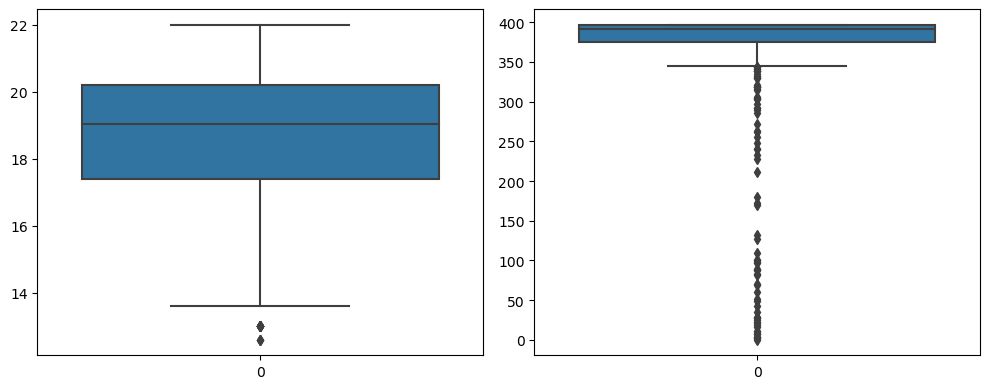

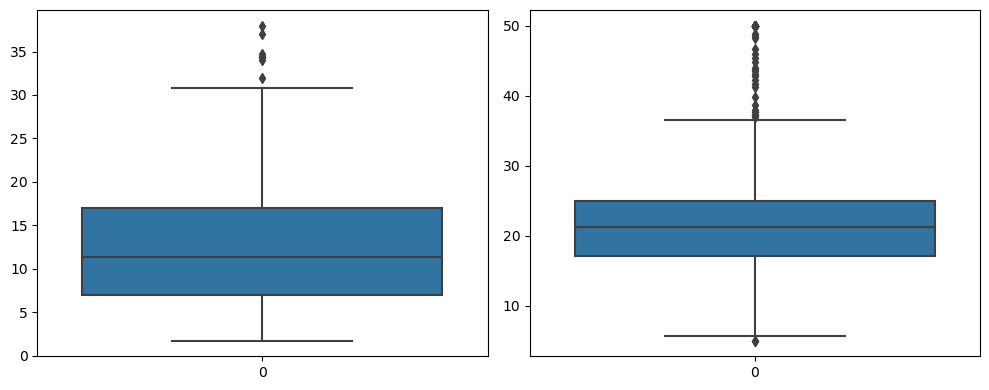

In [12]:
# Function to plot histograms
def plot_continuous_columns(dataframe):
    numeric_columns = dataframe.select_dtypes(include=['number']).columns.tolist()
    dataframe = dataframe[numeric_columns]
    
    for i in range(0,len(numeric_columns),2):
        if len(numeric_columns) > i+1:
            plt.figure(figsize=(10,4))
            plt.subplot(121)
            sns.distplot(dataframe[numeric_columns[i]], kde=False)
            plt.subplot(122)            
            sns.distplot(dataframe[numeric_columns[i+1]], kde=False)
            plt.tight_layout()
            plt.show()

        else:
            sns.distplot(dataframe[numeric_columns[i]], kde=False)

# Function to plot boxplots
def plot_box_plots(dataframe):
    numeric_columns = dataframe.select_dtypes(include=['number']).columns.tolist()
    dataframe = dataframe[numeric_columns]
    
    for i in range(0,len(numeric_columns),2):
        if len(numeric_columns) > i+1:
            plt.figure(figsize=(10,4))
            plt.subplot(121)
            sns.boxplot(dataframe[numeric_columns[i]])
            plt.subplot(122)            
            sns.boxplot(dataframe[numeric_columns[i+1]])
            plt.tight_layout()
            plt.show()

        else:
            sns.boxplot(dataframe[numeric_columns[i]])

    
    
print("Histograms\n")
plot_continuous_columns(boston_data)  

print("===="*30)
print('\nBox Plots\n')
plot_box_plots(boston_data)

In [13]:
# Function to detect outliers in every feature
def detect_outliers(boston_data):
    cols = list(boston_data)
    outliers = pd.DataFrame(columns=['Feature', 'Number of Outliers'])
    for column in cols:
        if column in boston_data.select_dtypes(include=np.number).columns:
            q1 = boston_data[column].quantile(0.25)
            q3 = boston_data[column].quantile(0.75)
            iqr = q3 - q1
            fence_low = q1 - (1.5 * iqr)
            fence_high = q3 + (1.5 * iqr)
            number_of_outliers = boston_data.loc[(boston_data[column] < fence_low) | (boston_data[column] > fence_high)].shape[0]
            outliers = pd.concat([outliers, pd.DataFrame({'Feature': [column], 'Number of Outliers': [number_of_outliers]})], ignore_index=True)
    return outliers

detect_outliers(boston_data)

,Feature,Number of Outliers
0,crim,66
1,zn,68
2,indus,0
3,chas,35
4,nox,0
5,rm,30
6,age,0
7,dis,5
8,rad,0
9,tax,0


### 
- The columns CRIM,ZN,B and MEDV are heavily skewed. This is due to the presence of the Outliers present in our dataset. We will deal with outliers in the upcoming steps.

- We can see that the values in the column CHAS are almost 0. This means that Charles River dummy variables are all 0, which in turn means that tract does not bound rivers.

- Since the features CHAS consist majorly only of a single value, it's variance is quite less and hence we can drop it since technically will be of no help in prediction.

In [14]:
boston_data.drop(['chas'],axis=1,inplace=True)


boston_data.columns

Index(['crim', 'zn', 'indus', 'nox', 'rm', 'age', 'dis', 'rad', 'tax',
       'ptratio', 'b', 'lstat', 'medv'],
      dtype='object')

#### note:

- Treating outliers in the continuous columns¶

- Outliers can be treated in a variety of ways. It depends on the skewness of the feature.

- To reduce right skewness, we use roots or logarithms or reciprocals (roots are weakest). This is the most common problem in practice.

- To reduce left skewness, we take squares or cubes or higher powers.

- But in our data, some of the features have negative values and also the value 0. In such cases, square root transform or logarithmic transformation cannot be used since we cannot take square root of negative values and logarithm of zero is not defined.

- Hence for this data we use a method called Winsorization. In this method we define a confidence interval of let's say 90% and then replace all the outliers below the 5th percentile with the value at 5th percentile and all the values above 95th percentile with the value at the 95th percentile. It is pretty useful when there are negative values and zeros in the features which cannot be treated with log transforms or square roots. 

##### Lets' write a function below that treats all the outliers in the numeric features using winsorization.



In [15]:
from scipy.stats.mstats import winsorize

# Function to treat outliers 

def treat_outliers(dataframe):
    cols = list(dataframe)
    for col in cols:
        if col in dataframe.select_dtypes(include=np.number).columns:
            dataframe[col] = winsorize(dataframe[col], limits=[0.05, 0.1],inclusive=(True, True))
    
    return dataframe    


df = treat_outliers(boston_data)



detect_outliers(boston_data)

C:\Users\thesh\anaconda3\Lib\site-packages\numpy\lib\function_base.py:4737: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(
C:\Users\thesh\anaconda3\Lib\site-packages\numpy\lib\function_base.py:4737: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(
C:\Users\thesh\anaconda3\Lib\site-packages\numpy\lib\function_base.py:4737: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(
C:\Users\thesh\anaconda3\Lib\site-packages\numpy\lib\function_base.py:4737: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(
C:\Users\thesh\anaconda3\Lib\site-packages\numpy\lib\function_base.py:4737: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(
C:\Users\thesh\anaconda3\Lib\site-packages\numpy\lib\function_base.py:4737: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArra

,Feature,Number of Outliers
0,crim,66
1,zn,68
2,indus,0
3,nox,0
4,rm,0
5,age,0
6,dis,0
7,rad,0
8,tax,0
9,ptratio,0


#### We can see that the outliers are removed. The outliers, shown above, in columns CRIM,ZN and B are actually not outliers. They are the majority values present in out dataset.

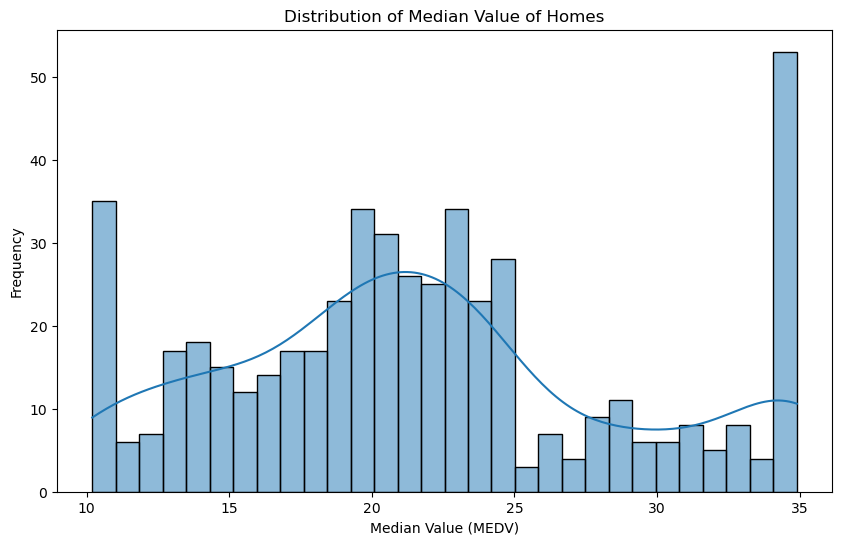

C:\Users\thesh\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


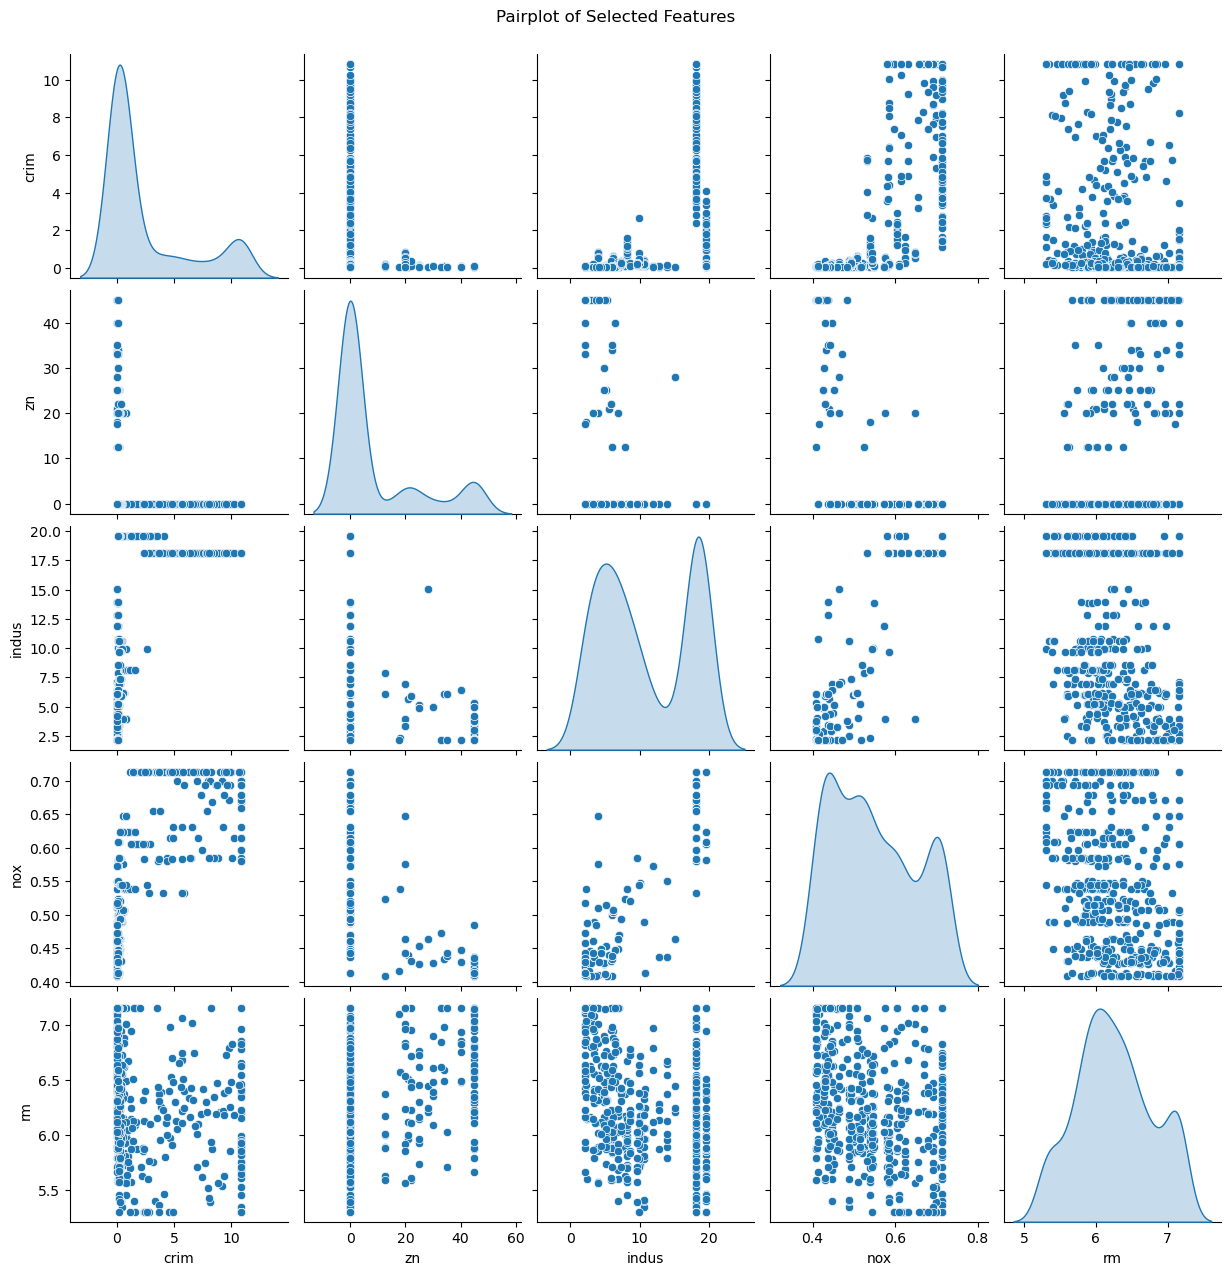

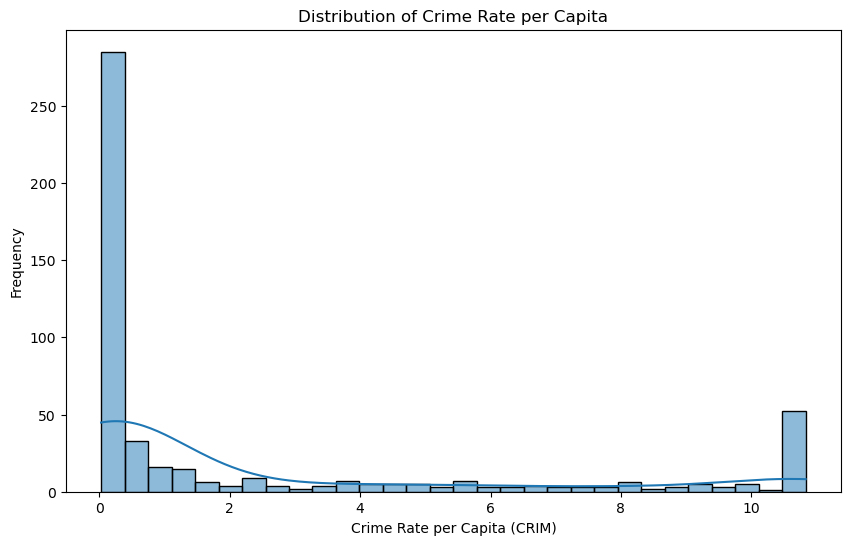

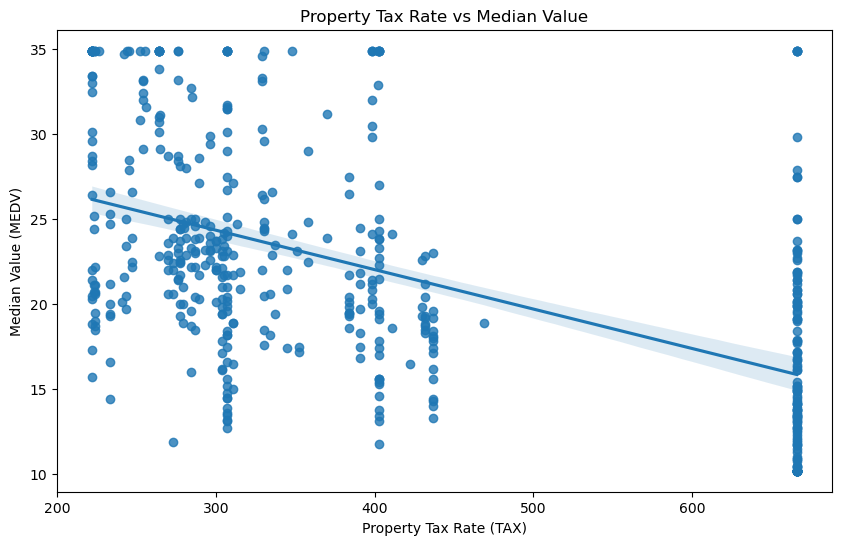

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

# Histogram of the target variable MEDV
plt.figure(figsize=(10, 6))
sns.histplot(boston_data['medv'], bins=30, kde=True)
plt.title('Distribution of Median Value of Homes')
plt.xlabel('Median Value (MEDV)')
plt.ylabel('Frequency')
plt.show()

# Pairplot of selected features
sns.pairplot(boston_data[['crim', 'zn', 'indus', 'nox', 'rm']], diag_kind='kde')
plt.suptitle('Pairplot of Selected Features', y=1.02)
plt.show()

# Distribution plot of CRIM
plt.figure(figsize=(10, 6))
sns.histplot(boston_data['crim'], bins=30, kde=True)
plt.title('Distribution of Crime Rate per Capita')
plt.xlabel('Crime Rate per Capita (CRIM)')
plt.ylabel('Frequency')
plt.show()

# Regression plot of TAX vs MEDV
plt.figure(figsize=(10, 6))
sns.regplot(x='tax', y='medv', data=boston_data)
plt.title('Property Tax Rate vs Median Value')
plt.xlabel('Property Tax Rate (TAX)')
plt.ylabel('Median Value (MEDV)')
plt.show()

# 

### Feature Extraction

# Modelling

In [32]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
import xgboost as xgb
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.model_selection import cross_val_score



In [18]:
# Split the data into training and testing sets
X = boston_data.drop('medv', axis=1)
y = boston_data['medv']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [19]:
# Initializind each of the models
models = {
    'Linear Regression': LinearRegression(),
    'Random Forest': RandomForestRegressor(random_state=42),
    'Decision Tree': DecisionTreeRegressor(random_state=42),
    'KNN': KNeighborsRegressor(),
    'XGBoost': xgb.XGBRegressor(random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(random_state=42),
    'AdaBoost': AdaBoostRegressor(random_state=42)
}

In [20]:
# Function to calculate adjusted R2 score
def adjusted_r2_score(r2, n, k):
    return 1 - (1 - r2) * ((n - 1) / (n - k - 1))

# Dictionary to store the results
extended_results = {
    'Model': [],
    'RMSE': [],
    'MAE': [],
    'R2': [],
    'Adjusted R2': [],
    'Cross-Validated R2': []
}

# Train and evaluate each model
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    adj_r2 = adjusted_r2_score(r2, X_test.shape[0], X_test.shape[1])
    cv_r2 = cross_val_score(model, X, y, cv=5, scoring='r2').mean()
    
    extended_results['Model'].append(name)
    extended_results['RMSE'].append(rmse)
    extended_results['MAE'].append(mae)
    extended_results['R2'].append(r2)
    extended_results['Adjusted R2'].append(adj_r2)
    extended_results['Cross-Validated R2'].append(cv_r2)

extended_results_df = pd.DataFrame(extended_results)

extended_results_df


,Model,RMSE,MAE,R2,Adjusted R2,Cross-Validated R2
0,Linear Regression,2.987632,2.109448,0.789920,0.761595,0.629520
1,Random Forest,2.383397,1.731637,0.866303,0.848276,0.687142
2,Decision Tree,3.414933,2.198039,0.725530,0.688523,0.397120
3,KNN,3.813494,2.918039,0.657724,0.611574,-0.207796
4,XGBoost,2.427831,1.831017,0.861271,0.842566,0.631024
5,Gradient Boosting,2.399924,1.796609,0.864442,0.846164,0.679759
6,AdaBoost,2.655329,2.239682,0.834054,0.811679,0.555222


#### Best Model Determination:
Based on the metrics:

- Random Forest has the lowest RMSE (2.38) and MAE (1.73), indicating better performance in terms of error metrics.

- Random Forest has a high R2 (0.87) and Adjusted R2 (0.84), suggesting it explains a significant portion of the variance in the data.

- Gradient Boosting and XGBoost also show strong performance, with high R2 and Adjusted R2 values, but Random Forest has slightly better error metrics.

- Random Forest has the highest Cross-Validated R2 (0.69), indicating good generalization performance.

#### Conclusion:
Random Forest is the best model among the evaluated ones, based on its superior performance across most evaluation metrics. It demonstrates the lowest error rates, high R2 values, and strong cross-validated performance.

# 

### Prediction:

#### Before going to predictions we will analyse some analyses for different machine learning models(Decision tree,random forst,gradient boosting and ada model) like Accuracy,AUC,model fitting, prediction of 10 models based on best model

### Some analysis

In [21]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.feature_selection import VarianceThreshold, SelectKBest, f_regression
from sklearn.metrics import accuracy_score, roc_auc_score
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestRegressor, GradientBoostingClassifier, AdaBoostClassifier
import matplotlib.pyplot as plt
import numpy as np

In [22]:
# Configuration settings
target_idx = 0  # Index of Target variable
cross_val = 0  # Control Switch for CV
norm_target = 0  # Normalize target switch
norm_features = 0  # Normalize features switch
binning = 0  # Control Switch for Bin Target
bin_cnt = 2  # If bin target, this sets number of classes
feat_select = 0  # Control Switch for Feature Selection
fs_type = 2  # Feature Selection type (1=Stepwise Backwards Removal, 2=Wrapper Select, 3=Univariate Selection)
lv_filter = 0  # Control switch for low variance filter on features
feat_start = 1  # Start column of features
rand_st = 1  # Set Random State variable for randomizing splits on runs


In [23]:
# Normalize target if required
if norm_target:
    scaler = StandardScaler()
    y = scaler.fit_transform(y.values.reshape(-1, 1)).flatten()

# Normalize features if required
if norm_features:
    scaler = MinMaxScaler()
    X = scaler.fit_transform(X)

# Binning the target variable if required
if binning:
    y = pd.qcut(y, bin_cnt, labels=False, duplicates='drop')

# Low variance filtering if required
if lv_filter:
    selector = VarianceThreshold()
    X = selector.fit_transform(X)

# Feature selection if required
if feat_select:
    if fs_type == 1:
        selector = SelectKBest(f_regression, k='all')
    elif fs_type == 2:
        selector = SelectKBest(f_regression, k=feat_start)
    else:
        selector = SelectKBest(f_regression, k=feat_start)
    X = selector.fit_transform(X, y)


Gini Cross-Validation Scores: [0.80246914 0.86419753 0.74074074 0.81481481 0.725     ]
Entropy Cross-Validation Scores: [0.72839506 0.79012346 0.74074074 0.83950617 0.825     ]


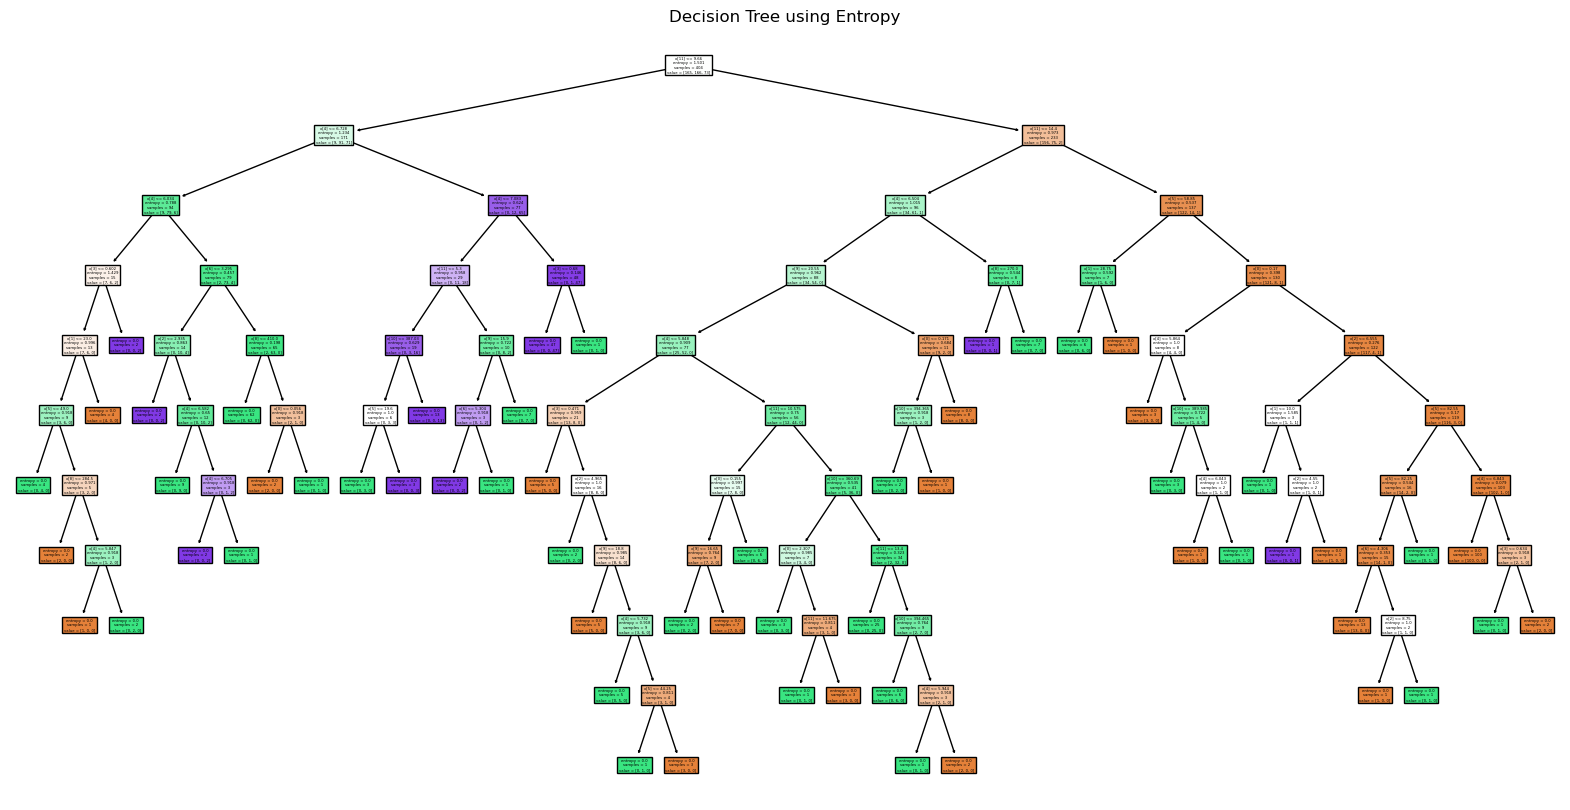

In [24]:
# Assuming X_train and y_train are defined, and y_train is categorical
rand_st = 42  # Example random state
cross_val = True  # Example flag for cross-validation

# Example to convert y_train to categorical if it's not already
# Example of binning a continuous target into discrete categories
bins = pd.cut(y_train, bins=[-np.inf, 10, 20, 30, np.inf], labels=[0, 1, 2, 3])
y_train = bins.astype('category')


# Define and fit Decision Tree models
dt_gini = DecisionTreeClassifier(criterion='gini', random_state=rand_st)
dt_entropy = DecisionTreeClassifier(criterion='entropy', random_state=rand_st)

dt_gini.fit(X_train, y_train)
dt_entropy.fit(X_train, y_train)

# Cross-validation
if cross_val:
    gini_cv = cross_val_score(dt_gini, X_train, y_train, cv=5)
    entropy_cv = cross_val_score(dt_entropy, X_train, y_train, cv=5)
    print(f'Gini Cross-Validation Scores: {gini_cv}')
    print(f'Entropy Cross-Validation Scores: {entropy_cv}')

# Plotting decision tree using Entropy criterion
plt.figure(figsize=(20, 10))
plot_tree(dt_entropy, filled=True)
plt.title('Decision Tree using Entropy')
plt.show()

In [25]:
import time
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import roc_auc_score, mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score, KFold
from sklearn.preprocessing import Binarizer

# Handle annoying warnings
import warnings, sklearn.exceptions
warnings.filterwarnings("ignore", category=sklearn.exceptions.ConvergenceWarning)

# Assuming X_train, y_train, X_test, and y_test are already defined
rand_st = 42  # Example random state

# Define and fit Random Forest Regressor
rf = RandomForestRegressor(n_estimators=100, min_samples_split=3, random_state=rand_st)
rf.fit(X_train, y_train)
rf_predictions = rf.predict(X_test)

# Define custom accuracy function for regression
def regression_accuracy(y_true, y_pred, tolerance=0.1):
    with np.errstate(divide='ignore', invalid='ignore'):
        relative_error = np.abs((y_pred - y_true) / y_true)
        relative_error[~np.isfinite(relative_error)] = 0  # Handle division by zero
        return np.mean(relative_error < tolerance)

# Evaluate the model using regression metrics
mae = mean_absolute_error(y_test, rf_predictions)
mse = mean_squared_error(y_test, rf_predictions)
r2 = r2_score(y_test, rf_predictions)
rf_accuracy = regression_accuracy(y_test, rf_predictions)

print(f'Mean Absolute Error: {mae}')
print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')
print(f'Custom Regression Accuracy: {rf_accuracy}')

# Cross-validation with runtime
scorer = 'neg_mean_squared_error'  # Use regression metric for cross-validation scoring
cv = KFold(n_splits=5)

start_time = time.time()
cv_scores = cross_val_score(rf, X_train, y_train, cv=cv, scoring=scorer)
end_time = time.time()
cv_runtime = end_time - start_time

# Convert negative MSE scores to positive for interpretability
cv_scores = -cv_scores

print(f'Cross-Validation MSE Scores: {cv_scores}')
print(f'Cross-Validation Runtime: {cv_runtime} seconds')

# Binarize the target variable for AUC calculation
# Use Binarizer to try multiple thresholds until we find a balanced split
thresholds = [np.percentile(y_train, q) for q in range(10, 100, 10)]
y_train_binary = None
y_test_binary = None
y_train_np = y_train.values.reshape(-1, 1)
y_test_np = y_test.values.reshape(-1, 1)

for threshold in thresholds:
    binarizer = Binarizer(threshold=threshold)
    y_train_binary = binarizer.fit_transform(y_train_np).flatten().astype(int)
    y_test_binary = binarizer.transform(y_test_np).flatten().astype(int)
    if len(np.unique(y_test_binary)) > 1:
        break

if len(np.unique(y_test_binary)) > 1:
    # Compute AUC
    auc = roc_auc_score(y_test_binary, rf_predictions)
    print(f'AUC: {auc}')
else:
    print("Binarized test target has only one class; AUC cannot be computed.")


Mean Absolute Error: 19.311860410831
Mean Squared Error: 408.99576921208484
R-squared: -8.626078847856565
Custom Regression Accuracy: 0.0
Cross-Validation MSE Scores: [0.13142283 0.11708741 0.14393086 0.11027356 0.12776639]
Cross-Validation Runtime: 2.6762003898620605 seconds
Binarized test target has only one class; AUC cannot be computed.


In [26]:
import numpy as np
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, roc_auc_score
from sklearn.model_selection import train_test_split

# Assuming X and y are already defined and preprocessed
rand_st = 42  # Example random state

# Convert continuous target to categorical if needed
# Example: Binning the continuous target into three categories
y_binned = np.digitize(y, bins=np.percentile(y, [33, 67]))

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_binned, test_size=0.2, random_state=rand_st)

# Define and fit Gradient Boosting Classifier
gb = GradientBoostingClassifier(loss='log_loss', learning_rate=0.1, max_depth=3, min_samples_split=3, random_state=rand_st)
gb.fit(X_train, y_train)
gb_predictions = gb.predict(X_test)
gb_probabilities = gb.predict_proba(X_test)

# Evaluate the model
gb_accuracy = accuracy_score(y_test, gb_predictions)
gb_auc = roc_auc_score(y_test, gb_probabilities, multi_class='ovr')

print(f'Gradient Boosting Accuracy: {gb_accuracy}')
print(f'Gradient Boosting AUC: {gb_auc}')
# Evaluate the model using regression metrics
mae = mean_absolute_error(y_test, gb_predictions)
mse = mean_squared_error(y_test, gb_predictions)
r2 = r2_score(y_test, gb_predictions)

print(f'Mean Absolute Error: {mae}')
print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

Gradient Boosting Accuracy: 0.7941176470588235
Gradient Boosting AUC: 0.9226571268237934
Mean Absolute Error: 0.21568627450980393
Mean Squared Error: 0.23529411764705882
R-squared: 0.6344086021505377


In [27]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score, roc_auc_score
from sklearn.model_selection import train_test_split

# Assuming X and y are already defined and preprocessed
rand_st = 42  # Example random state

# Convert continuous target to categorical if needed
# Example: Binning the continuous target into three categories
y_binned = np.digitize(y, bins=np.percentile(y, [33, 67]))

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_binned, test_size=0.2, random_state=rand_st)

# Define and fit AdaBoost Classifier
ab = AdaBoostClassifier(learning_rate=0.1, random_state=rand_st)
ab.fit(X_train, y_train)
ab_predictions = ab.predict(X_test)
ab_probabilities = ab.predict_proba(X_test)

# Evaluate the model
ab_accuracy = accuracy_score(y_test, ab_predictions)
ab_auc = roc_auc_score(y_test, ab_probabilities, multi_class='ovr')

print(f'AdaBoost Accuracy: {ab_accuracy}')
print(f'AdaBoost AUC: {ab_auc}')


AdaBoost Accuracy: 0.7058823529411765
AdaBoost AUC: 0.8709666105499437


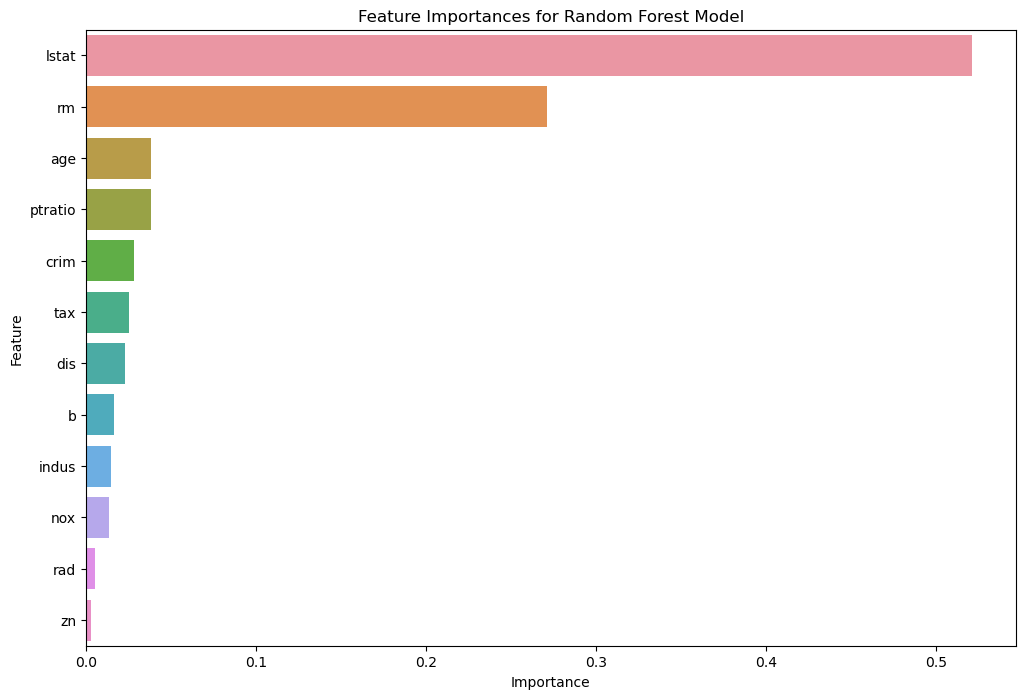

In [28]:
# Get feature importances from the Random Forest model
feature_importances = rf.feature_importances_
features = X.columns

# Create a DataFrame for feature importances
feature_importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot the feature importances
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Feature Importances for Random Forest Model')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()


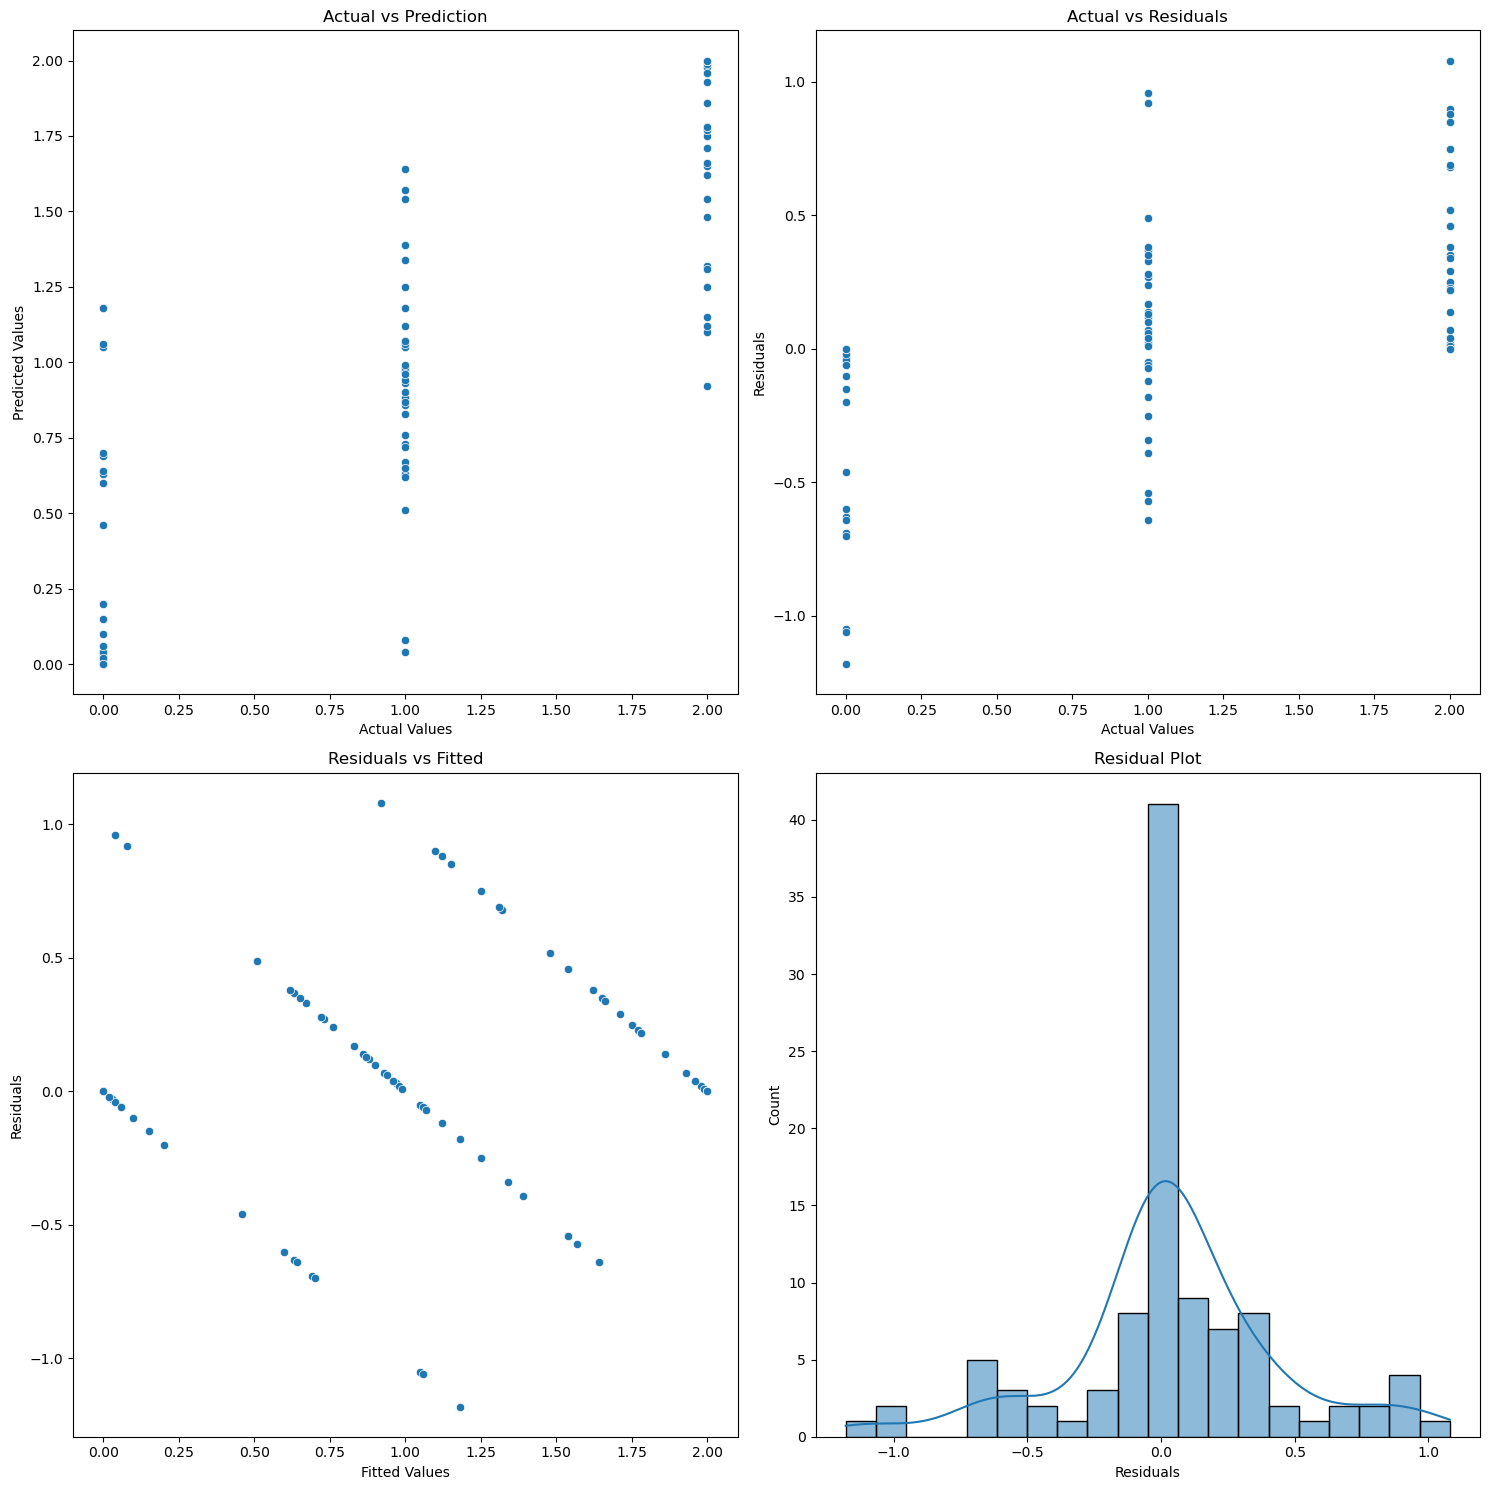

In [29]:
# Plotting Actual vs Prediction, Actual vs Residual, and Residual vs Fitted for the best model (Random Forest)

# Predict using the Random Forest model
best_model = RandomForestRegressor(random_state=42)
best_model.fit(X_train, y_train)
y_pred = best_model.predict(X_test)
residuals = y_test - y_pred

# Create the plots
fig, axs = plt.subplots(2, 2, figsize=(15, 15))

# Actual vs Prediction
sns.scatterplot(x=y_test, y=y_pred, ax=axs[0, 0])
axs[0, 0].set_title('Actual vs Prediction')
axs[0, 0].set_xlabel('Actual Values')
axs[0, 0].set_ylabel('Predicted Values')

# Actual vs Residuals
sns.scatterplot(x=y_test, y=residuals, ax=axs[0, 1])
axs[0, 1].set_title('Actual vs Residuals')
axs[0, 1].set_xlabel('Actual Values')
axs[0, 1].set_ylabel('Residuals')

# Residuals vs Fitted
sns.scatterplot(x=y_pred, y=residuals, ax=axs[1, 0])
axs[1, 0].set_title('Residuals vs Fitted')
axs[1, 0].set_xlabel('Fitted Values')
axs[1, 0].set_ylabel('Residuals')

# Residual plot
sns.histplot(residuals, kde=True, ax=axs[1, 1])
axs[1, 1].set_title('Residual Plot')
axs[1, 1].set_xlabel('Residuals')

plt.tight_layout()
plt.show()


In [30]:
# Get the next 10 predictions
predictions = best_model.predict(X_test[:10])
actual_values = y_test[:10]

# Create a DataFrame for the predictions and actual values
results_df = pd.DataFrame({
    'Actual medv': actual_values,
    'Predicted medv': predictions
})

results_df

,Actual medv,Predicted medv
0,1,1.39
1,2,1.96
2,0,0.63
3,1,1.57
4,0,0.06
5,1,0.97
6,0,0.60
7,0,0.00
8,1,0.96
9,0,1.05


In [31]:
# Predict the entire test set
predictions = best_model.predict(X_test)
actual_values = y_test

# Create a DataFrame for the predictions and actual values
results_df = X_test.copy()
results_df['Actual medv'] = actual_values
results_df['Predicted medv'] = predictions

# Display the results
#import ace_tools as tools; tools.display_dataframe_to_user(name="Full Predictions with Attributes", dataframe=results_df)

results_df.head(10)


,crim,zn,indus,nox,rm,age,dis,rad,tax,ptratio,b,lstat,Actual medv,Predicted medv
173,0.09178,0.0,4.05,0.510,6.416,84.1,2.6463,5,296,16.6,395.50,9.04,1,1.39
274,0.05644,40.0,6.41,0.447,6.758,32.9,4.0776,4,254,17.6,396.90,3.70,2,1.96
491,0.10574,0.0,19.58,0.609,5.983,98.8,1.8681,4,666,20.1,390.11,18.07,0,0.63
72,0.09164,0.0,10.81,0.413,6.065,17.7,5.2873,4,305,19.2,390.91,5.52,1,1.57
452,5.09017,0.0,18.10,0.713,6.297,91.8,2.3682,24,666,20.2,385.09,17.27,0,0.06
76,0.10153,0.0,12.83,0.437,6.279,74.5,4.0522,5,398,18.7,373.66,11.97,1,0.97
316,0.31827,0.0,9.90,0.544,5.914,83.2,3.9986,4,304,18.4,390.70,18.33,0,0.60
140,0.29090,0.0,19.58,0.624,6.174,93.6,1.6119,4,437,20.9,388.08,23.09,0,0.00
471,4.03841,0.0,18.10,0.532,6.229,90.7,3.0993,24,666,20.2,395.33,12.87,1,0.96
500,0.22438,0.0,9.69,0.585,6.027,79.7,2.4982,6,391,19.2,396.90,14.33,0,1.05
